# Testing VAE with Single Point Dataset

## Testing Convolutional Autoencoder (CAE)

In [9]:
from autoencoders.CAE import CAE as CAE
from experiment_datasets.single_point import generate_single_point
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [10]:
import tensorflow as tf

devices = tf.config.list_physical_devices('GPU')

if len(devices) < 1:
    raise Exception("Cannot initialize GPU")

print("GPU configured correctly")

GPU configured correctly


In [11]:
dataset, validation = generate_single_point(5, 5, validation_split=0.20)
INPUT_SHAPE = dataset.shape[1:]
DATASET_SIZE = dataset.shape[0]
VALIDATION_SIZE = validation.shape[0]
print(dataset.shape)
print(validation.shape)

(20, 5, 5, 1)
(5, 5, 5, 1)


In [12]:
cae = CAE(
    layers=2,
    input_shape=INPUT_SHAPE,
    latent_size=8,
    filters=8,
    kernel_size=3,
    name="VAE")
cae.summary()

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_encoder (InputLayer)   [(None, 5, 5, 1)]         0         
_________________________________________________________________
conv1_enc (Conv2D)           (None, 5, 5, 8)           80        
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 3, 3, 8)           0         
_________________________________________________________________
conv2_enc (Conv2D)           (None, 3, 3, 16)          1168      
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 2, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
bottleneck (Dense)           (None, 8)                 520 

In [13]:
callbacks = [
    #EarlyStopping(monitor='val_loss', patience=40)
]

batch_size = dataset.shape[0] if dataset.shape[0] < 32 else 32

history = cae.train_primitive(
    dataset, 
    validation, 
    epochs=250,
    batch_size=batch_size,
    callbacks=callbacks
)

s: 0.1688 - val_loss: 0.1936
Epoch 71/270
1/1 [==============================] - 0s 31ms/step - loss: 0.1685 - val_loss: 0.1936
Epoch 72/270
1/1 [==============================] - 0s 31ms/step - loss: 0.1682 - val_loss: 0.1937
Epoch 73/270
1/1 [==============================] - 0s 31ms/step - loss: 0.1679 - val_loss: 0.1939
Epoch 74/270
1/1 [==============================] - 0s 31ms/step - loss: 0.1675 - val_loss: 0.1941
Epoch 75/270
1/1 [==============================] - 0s 33ms/step - loss: 0.1671 - val_loss: 0.1944
Epoch 76/270
1/1 [==============================] - 0s 31ms/step - loss: 0.1668 - val_loss: 0.1948
Epoch 77/270
1/1 [==============================] - 0s 32ms/step - loss: 0.1665 - val_loss: 0.1952
Epoch 78/270
1/1 [==============================] - 0s 32ms/step - loss: 0.1662 - val_loss: 0.1956
Epoch 79/270
1/1 [==============================] - 0s 32ms/step - loss: 0.1661 - val_loss: 0.1960
Epoch 80/270
1/1 [==============================] - 0s 31ms/step - loss: 0.1659 

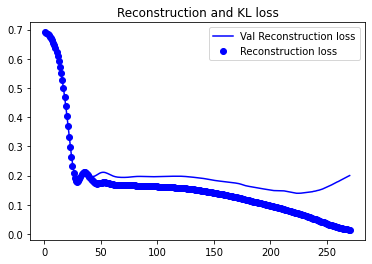

In [14]:
val_rec_loss = history.history['val_loss']
rec_loss = history.history['loss']

epochs = range(1, len(val_rec_loss) + 1)    

plt.plot(epochs, val_rec_loss, 'b', label='Val Reconstruction loss')
plt.plot(epochs, rec_loss, 'bo', label='Reconstruction loss')
plt.title('Reconstruction and KL loss')
plt.legend()

In [15]:
print(VALIDATION_SIZE)

5


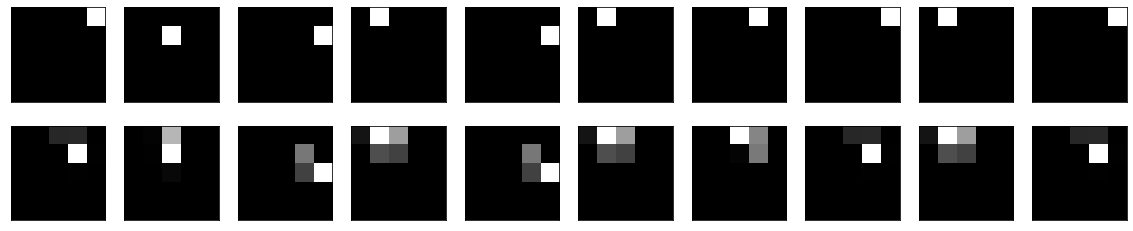

In [16]:
import random
import numpy as np

n = 10
images = np.empty((n, *INPUT_SHAPE))

for i in range(n):
    rand_img = random.randint(0, VALIDATION_SIZE-1)
    images[i] = validation[rand_img]

decoded_imgs = cae.predict(images)
#latent = vae.encoder.predict(images)

#decoded_imgs = vae.decoder.predict(latent[:][2])

plt.figure(figsize=(20, 4))

for i in range(1, n+1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(images[i-1].reshape(INPUT_SHAPE[0], INPUT_SHAPE[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i-1].reshape(INPUT_SHAPE[0], INPUT_SHAPE[1]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()